# Amazon Alexa Reviews Sentiment Analysis
It is a classification model to predict the sentiment either (1 or 0) based on Amazon Alexa reviews

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

## 1) Read the dataset

In [2]:
data=pd.read_csv('amazon_alexa.csv')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


## 2) Remove handle null values

In [3]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


## 3) Preprocess the Amazon Alexa reviews based on the following parameter:

In [5]:
for i in range(5):
    print(data['verified_reviews'].iloc[i],"\n")

Love my Echo! 

Loved it! 

Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. 

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. 

Music 



In [6]:
def data_processing(text):
    
#b) Convert words to lower case
    text = text.lower() 
    
#a) Tokenizing words
    text_tokens = word_tokenize(text)
    
#c) Removing Punctuations
    text = re.sub(r'[^\w\s]','',text)
    
#d) Removing Stop words
    filtered_text = [w for w in text_tokens if not w in stop_words]
    
    return " ".join(filtered_text)

In [7]:
data.verified_reviews = data['verified_reviews'].apply(data_processing)

In [8]:
#e) Stemming 
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [9]:
data['verified_reviews'] = data['verified_reviews'].apply(lambda x: stemming(x))

In [10]:
for i in range(5):
    print(data['verified_reviews'].iloc[i],"\n")

love echo ! 

loved ! 

sometimes playing game , answer question correctly alexa says got wrong answers . like able turn lights away home . 

lot fun thing . 4 yr old learns dinosaurs , control lights play games like categories . nice sound playing music well . 

music 



## 4) Transform the words into vectors using

In [11]:
X = data['verified_reviews']
Y = data['feedback']

#a) Count Vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data['verified_reviews'])

## 5) Split data into training and test data

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
print("Size of x_train: ",(x_train.shape))
print("Size of y_train: ",(y_train.shape))
print("Size of x_test: ",(x_test.shape))
print("Size of y_test: ",(y_test.shape))

Size of x_train:  (2520, 3961)
Size of y_train:  (2520,)
Size of x_test:  (630, 3961)
Size of y_test:  (630,)


## 6) a) Multinomial Naïve Bayes Classification


In [13]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
mnb_acc = accuracy_score(mnb_pred, y_test)
print('Accuracy Score: {:.2f}%'.format(mnb_acc*100))
print('\nConfusion Matrix:\n',confusion_matrix(y_test, mnb_pred))
print('\nClassification Report:\n',classification_report(y_test, mnb_pred))

Accuracy Score: 91.75%

Confusion Matrix:
 [[ 15  43]
 [  9 563]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.26      0.37        58
           1       0.93      0.98      0.96       572

    accuracy                           0.92       630
   macro avg       0.78      0.62      0.66       630
weighted avg       0.90      0.92      0.90       630



## b) Logistic Regression 

In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)

In [16]:
logreg_acc = accuracy_score(logreg_pred, y_test)
print('Accuracy Score: {:.2f}%'.format(logreg_acc*100))
print('\nConfusion Matrix:\n',confusion_matrix(y_test, logreg_pred))
print('\nClassification Report:\n',classification_report(y_test, logreg_pred))

Accuracy Score: 93.17%

Confusion Matrix:
 [[ 18  40]
 [  3 569]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.31      0.46        58
           1       0.93      0.99      0.96       572

    accuracy                           0.93       630
   macro avg       0.90      0.65      0.71       630
weighted avg       0.93      0.93      0.92       630



## c) KNN Classification

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

In [18]:
knn_acc = accuracy_score(knn_pred, y_test)
print('Accuracy Score: {:.2f}%'.format(knn_acc*100))
print('\nConfusion Matrix:',confusion_matrix(y_test,knn_pred))
print('\nClassification Report:\n',classification_report(y_test,knn_pred))

Accuracy Score: 91.27%

Confusion Matrix: [[  5  53]
 [  2 570]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.09      0.15        58
           1       0.91      1.00      0.95       572

    accuracy                           0.91       630
   macro avg       0.81      0.54      0.55       630
weighted avg       0.90      0.91      0.88       630



## 9) Report the model with the best accuracy

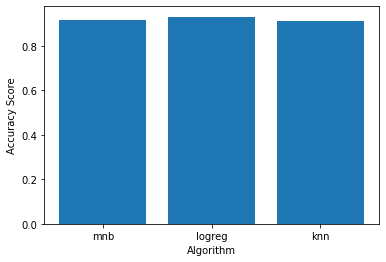

In [19]:
plt.bar(x=['mnb','logreg','knn'],height=[mnb_acc,logreg_acc,knn_acc])
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Score")
plt.show()

In [20]:
print('The model with the best accuracy: Logistic Regression')

The model with the best accuracy: Logistic Regression
